In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_X=r'D:/tarbiat class/ANN/xray_dataset_covid19/train'
test_X=r'D:/tarbiat class/ANN\xray_dataset_covid19/test'

In [5]:
import os
classes_train=os.listdir(train_X)
classes_test=os.listdir(test_X)

In [6]:
print(classes_train)

['NORMAL', 'PNEUMONIA']


In [7]:
print(classes_test)

['NORMAL', 'PNEUMONIA']


In [8]:
train_datagen = ImageDataGenerator(zoom_range=0.2,
    horizontal_flip=True,
    rescale=1.0/255.0, 
    width_shift_range=0.10, 
    height_shift_range=0.10, 
    shear_range=0.1 )
training_set = train_datagen.flow_from_directory(train_X,
                                                 target_size = (150,150),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                              color_mode='grayscale'  )

Found 148 images belonging to 2 classes.


In [9]:
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_set = test_datagen.flow_from_directory(test_X,
                                            target_size = (150,150),
                                            batch_size = 32,
                                            class_mode = 'binary',color_mode='grayscale' )

Found 40 images belonging to 2 classes.


In [10]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
earlystop=EarlyStopping(patience=6)
learning_rate_reduction=ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)

In [11]:
import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization,AveragePooling2D
callbacks = [earlystop, learning_rate_reduction]

In [12]:
model_1 = Sequential()
model_1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=[150,150,1],padding='same'))
model_1.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model_1.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same'))
model_1.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(units=128, activation='relu'))
model_1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [13]:
from tensorflow.keras.optimizers import Adam
opt_1 = Adam(learning_rate=0.001)
model_1.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
model_1.fit(training_set, validation_data = test_set, callbacks=callbacks, epochs =15)

Epoch 1/15
5/5 [==============================] - 21s 4s/step - loss: 1.1714 - accuracy: 0.5135 - val_loss: 0.7160 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/15
5/5 [==============================] - 15s 3s/step - loss: 0.7044 - accuracy: 0.5676 - val_loss: 0.6296 - val_accuracy: 0.5250 - lr: 0.0010
Epoch 3/15
5/5 [==============================] - 15s 3s/step - loss: 0.6365 - accuracy: 0.6014 - val_loss: 0.5176 - val_accuracy: 0.7750 - lr: 0.0010
Epoch 4/15
5/5 [==============================] - 24s 5s/step - loss: 0.5673 - accuracy: 0.7297 - val_loss: 0.2894 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 5/15
5/5 [==============================] - 16s 3s/step - loss: 0.4412 - accuracy: 0.8041 - val_loss: 0.1303 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 6/15
5/5 [==============================] - 15s 3s/step - loss: 0.3981 - accuracy: 0.8378 - val_loss: 0.0983 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 7/15
5/5 [==============================] - ETA: 0s - loss: 0.3683 - accuracy: 0.8446
Ep

In [14]:
model_2 = Sequential()
model_2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=[150,150,1],padding='same'))
model_2.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model_2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same'))
model_2.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model_2.add(tf.keras.layers.Flatten())
model_2.add(tf.keras.layers.Dense(units=128, activation='relu'))
model_2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [91]:
from tensorflow.keras.optimizers import Adam
opt_2 = Adam(learning_rate=0.1)
model_2.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
mod_2 = model_2.fit(x = training_set, validation_data = test_set,callbacks=callbacks, epochs =15)

Epoch 1/15
5/5 [==============================] - 16s 3s/step - loss: 0.7962 - accuracy: 0.7365 - val_loss: 0.1132 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 2/15
5/5 [==============================] - 14s 3s/step - loss: 0.4317 - accuracy: 0.8243 - val_loss: 0.1419 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 3/15
5/5 [==============================] - 14s 3s/step - loss: 0.3134 - accuracy: 0.8716 - val_loss: 0.0726 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 4/15
5/5 [==============================] - 14s 3s/step - loss: 0.2740 - accuracy: 0.8784 - val_loss: 0.0883 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 5/15
5/5 [==============================] - 13s 3s/step - loss: 0.2811 - accuracy: 0.8784 - val_loss: 0.0603 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 6/15
5/5 [==============================] - ETA: 0s - loss: 0.2634 - accuracy: 0.8986
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
5/5 [==============================] - 13s 2s/step - loss: 0.2634 - accuracy:

In [16]:
model_3 = Sequential() 
model_3.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=[150,150,1],padding='same'))
model_3.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model_3.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same'))
model_3.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model_3.add(tf.keras.layers.Flatten())
model_3.add(tf.keras.layers.Dense(units=128, activation='relu'))
model_3.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [90]:
from tensorflow.keras.optimizers import Adam
opt_3 = Adam(learning_rate=0.1)
model_3.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
mod_3 = model_3.fit(x = training_set, validation_data = test_set,callbacks=callbacks, epochs =10)

Epoch 1/10
5/5 [==============================] - 19s 3s/step - loss: 0.3418 - accuracy: 0.8784 - val_loss: 0.1210 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 2/10
5/5 [==============================] - 14s 3s/step - loss: 0.3049 - accuracy: 0.8581 - val_loss: 0.1032 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/10
5/5 [==============================] - 14s 2s/step - loss: 0.4318 - accuracy: 0.8041 - val_loss: 0.1793 - val_accuracy: 0.9250 - lr: 0.0010
Epoch 4/10
5/5 [==============================] - 15s 3s/step - loss: 0.2720 - accuracy: 0.8919 - val_loss: 0.1701 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 5/10
5/5 [==============================] - ETA: 0s - loss: 0.3215 - accuracy: 0.8108
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
5/5 [==============================] - 14s 3s/step - loss: 0.3215 - accuracy: 0.8108 - val_loss: 0.0655 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/10
5/5 [==============================] - 15s 3s/step - loss: 0.3041 - accuracy:

In [18]:
model_4 = Sequential() # same as model_3 except changing activation to linear
model_4.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='linear', input_shape=[150,150,1],padding='same'))
model_4.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model_4.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='linear',padding='same'))
model_4.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model_4.add(tf.keras.layers.Flatten())
model_4.add(tf.keras.layers.Dense(units=128, activation='linear'))
model_4.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [19]:
from tensorflow.keras.optimizers import Adam
opt_4 = Adam(learning_rate=0.1)
model_4.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
mod_4 = model_4.fit(x = training_set, validation_data = test_set,callbacks=callbacks, epochs =10)

Epoch 1/10
5/5 [==============================] - 27s 4s/step - loss: 5.3743 - accuracy: 0.6419 - val_loss: 7.9642 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/10
5/5 [==============================] - 24s 5s/step - loss: 4.1584 - accuracy: 0.5946 - val_loss: 0.0650 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 3/10
5/5 [==============================] - 13s 3s/step - loss: 1.4148 - accuracy: 0.7230 - val_loss: 0.0620 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 4/10
5/5 [==============================] - 14s 2s/step - loss: 0.8197 - accuracy: 0.8243 - val_loss: 0.0245 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 5/10
5/5 [==============================] - ETA: 0s - loss: 0.9612 - accuracy: 0.7838
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
5/5 [==============================] - 13s 2s/step - loss: 0.9612 - accuracy: 0.7838 - val_loss: 0.0780 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 6/10
5/5 [==============================] - 13s 2s/step - loss: 0.3600 - accuracy:

In [20]:
model_5 = Sequential() #same to model_3 but changing kernel_size to kernel size to 2 and epoches 15
model_5.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=[150,150,1],padding='same'))
model_5.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model_5.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same'))
model_5.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model_5.add(tf.keras.layers.Flatten())
model_5.add(tf.keras.layers.Dense(units=128, activation='relu'))
model_5.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [21]:
from tensorflow.keras.optimizers import Adam
opt_5 = Adam(learning_rate=0.1)
model_5.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
model_5.fit(x = training_set, validation_data = test_set,callbacks=callbacks, epochs =15)

Epoch 1/15
5/5 [==============================] - 16s 3s/step - loss: 0.9885 - accuracy: 0.5135 - val_loss: 0.2199 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 2/15
5/5 [==============================] - 14s 3s/step - loss: 0.5045 - accuracy: 0.7230 - val_loss: 0.3788 - val_accuracy: 0.7250 - lr: 0.0010
Epoch 3/15
5/5 [==============================] - 14s 3s/step - loss: 0.4911 - accuracy: 0.7905 - val_loss: 0.1558 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/15
5/5 [==============================] - 14s 3s/step - loss: 0.4724 - accuracy: 0.7838 - val_loss: 0.1167 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 5/15
5/5 [==============================] - 13s 2s/step - loss: 0.4034 - accuracy: 0.8108 - val_loss: 0.0849 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 6/15
5/5 [==============================] - ETA: 0s - loss: 0.3602 - accuracy: 0.8581
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
5/5 [==============================] - 13s 2s/step - loss: 0.3602 - accuracy:

In [22]:
model_6 = Sequential() 
model_6.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=[150,150,1],padding='same'))
model_6.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model_6.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same'))
model_6.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model_6.add(tf.keras.layers.Flatten())
model_6.add(tf.keras.layers.Dense(units=128, activation='relu'))
model_6.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [23]:
from tensorflow.keras.optimizers import Adam
opt_6 = Adam(learning_rate=0.1)
model_6.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
mod_6 = model_6.fit(x = training_set, validation_data = test_set,callbacks=callbacks, epochs =30)

Epoch 1/30
5/5 [==============================] - 16s 3s/step - loss: 1.8078 - accuracy: 0.5811 - val_loss: 1.0531 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/30
5/5 [==============================] - 14s 3s/step - loss: 0.7637 - accuracy: 0.5541 - val_loss: 0.3871 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 3/30
5/5 [==============================] - 14s 2s/step - loss: 0.5136 - accuracy: 0.7703 - val_loss: 0.3408 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 4/30
5/5 [==============================] - 14s 3s/step - loss: 0.5015 - accuracy: 0.8108 - val_loss: 0.2722 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 5/30
5/5 [==============================] - 14s 2s/step - loss: 0.4189 - accuracy: 0.8514 - val_loss: 0.1535 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 6/30
5/5 [==============================] - ETA: 0s - loss: 0.3829 - accuracy: 0.8041
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
5/5 [==============================] - 13s 2s/step - loss: 0.3829 - accuracy:

In [24]:
model_7 = Sequential() 
model_7.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=[150,150,1],padding='same'))
model_7.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model_7.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu',padding='same'))
model_7.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model_7.add(tf.keras.layers.Flatten())
model_7.add(tf.keras.layers.Dense(units=128, activation='relu'))
model_7.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [25]:
from tensorflow.keras.optimizers import Adam
opt_7 = Adam(learning_rate=0.01)
model_7.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
mod_7 = model_7.fit(x = training_set, validation_data = test_set,callbacks=callbacks, epochs =15)

Epoch 1/15
5/5 [==============================] - 49s 11s/step - loss: 1.1713 - accuracy: 0.5068 - val_loss: 0.7066 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/15
5/5 [==============================] - 32s 5s/step - loss: 0.6480 - accuracy: 0.6014 - val_loss: 0.4847 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/15
5/5 [==============================] - 27s 5s/step - loss: 0.5798 - accuracy: 0.7365 - val_loss: 0.2553 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/15
5/5 [==============================] - 24s 4s/step - loss: 0.4283 - accuracy: 0.7973 - val_loss: 0.0800 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/15
5/5 [==============================] - ETA: 0s - loss: 0.3938 - accuracy: 0.7905
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
5/5 [==============================] - 23s 4s/step - loss: 0.3938 - accuracy: 0.7905 - val_loss: 0.0476 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/15
5/5 [==============================] - 24s 4s/step - loss: 0.4223 - accuracy

In [26]:
model_8 = Sequential() 
model_8.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=[150,150,1],padding='same'))
model_8.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
model_8.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu',padding='same'))
model_8.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
model_8.add(tf.keras.layers.Flatten())
model_8.add(tf.keras.layers.Dense(units=128, activation='relu'))
model_8.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [75]:
from tensorflow.keras.optimizers import Adam
opt_8 = Adam(learning_rate=0.01)
model_8.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
mod_8 = model_8.fit(x = training_set, validation_data = test_set,callbacks=callbacks, epochs =15)

Epoch 1/15
5/5 [==============================] - 28s 5s/step - loss: 0.6057 - accuracy: 0.8108 - val_loss: 0.2661 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 2/15
5/5 [==============================] - 23s 4s/step - loss: 0.4900 - accuracy: 0.7905 - val_loss: 0.2100 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 3/15
5/5 [==============================] - 23s 5s/step - loss: 0.4822 - accuracy: 0.8243 - val_loss: 0.2728 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 4/15
5/5 [==============================] - 22s 5s/step - loss: 0.4352 - accuracy: 0.8581 - val_loss: 0.0750 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/15
5/5 [==============================] - 22s 4s/step - loss: 0.3851 - accuracy: 0.8176 - val_loss: 0.0932 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 6/15
5/5 [==============================] - 22s 4s/step - loss: 0.3605 - accuracy: 0.8514 - val_loss: 0.0670 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 7/15
5/5 [==============================] - ETA: 0s - loss: 0.4020 - accuracy: 0.8176
Ep

In [28]:
model_9 = Sequential() 
model_9.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=[150,150,1],padding='same'))
model_9.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
model_9.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same'))
model_9.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
model_9.add(tf.keras.layers.Flatten())
model_9.add(tf.keras.layers.Dense(units=128, activation='relu'))
model_9.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [29]:
from tensorflow.keras.optimizers import Adam
opt_9 = Adam(learning_rate=0.001)
model_9.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
model_9.fit(x = training_set, validation_data = test_set,callbacks=callbacks, epochs =15)

Epoch 1/15
5/5 [==============================] - 15s 3s/step - loss: 1.2122 - accuracy: 0.5338 - val_loss: 0.6339 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/15
5/5 [==============================] - 13s 2s/step - loss: 0.6641 - accuracy: 0.5338 - val_loss: 0.5483 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 3/15
5/5 [==============================] - 13s 2s/step - loss: 0.6005 - accuracy: 0.8378 - val_loss: 0.4184 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 4/15
5/5 [==============================] - 13s 2s/step - loss: 0.5310 - accuracy: 0.7703 - val_loss: 0.2106 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/15
5/5 [==============================] - 13s 3s/step - loss: 0.4543 - accuracy: 0.7905 - val_loss: 0.1172 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 6/15
5/5 [==============================] - 13s 3s/step - loss: 0.3580 - accuracy: 0.8514 - val_loss: 0.0651 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 7/15
5/5 [==============================] - ETA: 0s - loss: 0.4292 - accuracy: 0.8041
Ep

In [30]:
model_10 = Sequential() 
model_10.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=[150,150,1],padding='same'))
model_10.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
model_10.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu',padding='same'))
model_10.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
model_10.add(tf.keras.layers.Flatten())
model_10.add(tf.keras.layers.Dense(units=128, activation='relu'))
model_10.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [31]:
from tensorflow.keras.optimizers import Adam
opt_10 = Adam(learning_rate=0.001)
model_10.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
mod_10 = model_10.fit(x = training_set, validation_data = test_set,callbacks=callbacks, epochs =30)

Epoch 1/30
5/5 [==============================] - 20s 4s/step - loss: 1.4258 - accuracy: 0.5203 - val_loss: 0.6548 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/30
5/5 [==============================] - 17s 3s/step - loss: 0.6957 - accuracy: 0.4932 - val_loss: 0.6382 - val_accuracy: 0.8500 - lr: 0.0010
Epoch 3/30
5/5 [==============================] - 17s 3s/step - loss: 0.6673 - accuracy: 0.6081 - val_loss: 0.5996 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/30
5/5 [==============================] - 18s 3s/step - loss: 0.6301 - accuracy: 0.6959 - val_loss: 0.4517 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/30
5/5 [==============================] - 18s 3s/step - loss: 0.5575 - accuracy: 0.7297 - val_loss: 0.2564 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 6/30
5/5 [==============================] - ETA: 0s - loss: 0.4003 - accuracy: 0.8446
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
5/5 [==============================] - 18s 3s/step - loss: 0.4003 - accuracy:

In [32]:
model_11 = Sequential() 
model_11.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='linear', input_shape=[150,150,1],padding='same'))
model_11.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
model_11.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation='linear',padding='same'))
model_11.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
model_11.add(tf.keras.layers.Flatten())
model_11.add(tf.keras.layers.Dense(units=128, activation='relu'))
model_11.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [33]:
from tensorflow.keras.optimizers import Adam
opt_11 = Adam(learning_rate=0.001)
model_11.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
model_11.fit(x = training_set, validation_data = test_set,callbacks=callbacks, epochs =10)

Epoch 1/10
5/5 [==============================] - 17s 3s/step - loss: 4.1247 - accuracy: 0.5270 - val_loss: 2.0732 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/10
5/5 [==============================] - 16s 3s/step - loss: 3.4955 - accuracy: 0.4730 - val_loss: 0.4665 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 3/10
5/5 [==============================] - 16s 3s/step - loss: 1.3293 - accuracy: 0.4865 - val_loss: 1.3171 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/10
5/5 [==============================] - 15s 3s/step - loss: 0.6484 - accuracy: 0.6554 - val_loss: 0.4871 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 5/10
5/5 [==============================] - 15s 3s/step - loss: 0.6487 - accuracy: 0.6554 - val_loss: 0.1867 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 6/10
5/5 [==============================] - 15s 3s/step - loss: 0.4745 - accuracy: 0.7635 - val_loss: 0.3970 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 7/10
5/5 [==============================] - 15s 3s/step - loss: 0.4421 - accuracy: 0.817

In [34]:
model_12 = Sequential() 
model_12.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='linear', input_shape=[150,150,1],padding='same'))
model_12.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
model_12.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation='linear',padding='same'))
model_12.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
model_12.add(tf.keras.layers.Flatten())
model_12.add(tf.keras.layers.Dense(units=128, activation='relu'))
model_12.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [35]:
from tensorflow.keras.optimizers import Adam
opt_12 = Adam(learning_rate=0.1)
model_12.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
model_12.fit(x = training_set, validation_data = test_set,callbacks=callbacks, epochs =10)

Epoch 1/10
5/5 [==============================] - 18s 3s/step - loss: 1.9400 - accuracy: 0.4797 - val_loss: 4.3426 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/10
5/5 [==============================] - 16s 3s/step - loss: 1.7709 - accuracy: 0.5811 - val_loss: 0.9081 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/10
5/5 [==============================] - 16s 3s/step - loss: 0.8667 - accuracy: 0.5068 - val_loss: 0.5108 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 4/10
5/5 [==============================] - 16s 3s/step - loss: 0.6644 - accuracy: 0.5541 - val_loss: 0.5177 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/10
5/5 [==============================] - 16s 3s/step - loss: 0.5887 - accuracy: 0.7162 - val_loss: 0.4906 - val_accuracy: 0.8250 - lr: 0.0010
Epoch 6/10
5/5 [==============================] - ETA: 0s - loss: 0.5816 - accuracy: 0.6959
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
5/5 [==============================] - 15s 3s/step - loss: 0.5816 - accuracy:

In [36]:
model_13 = Sequential() 
model_13.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='linear', input_shape=[150,150,1],padding='same'))
model_13.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
model_13.add(Dropout(0.25))
model_13.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation='linear',padding='same'))
model_13.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
model_13.add(Dropout(0.25))
model_13.add(tf.keras.layers.Flatten())
model_13.add(tf.keras.layers.Dense(units=128, activation='relu'))
model_13.add(Dropout(0.3))
model_13.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [37]:
from tensorflow.keras.optimizers import Adam
opt_13 = Adam(learning_rate=0.1)
model_13.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
model_13.fit(x = training_set, validation_data = test_set,callbacks=callbacks, epochs =10)

Epoch 1/10
5/5 [==============================] - 18s 3s/step - loss: 4.0672 - accuracy: 0.4932 - val_loss: 0.4414 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 2/10
5/5 [==============================] - 16s 3s/step - loss: 1.2584 - accuracy: 0.5405 - val_loss: 0.7540 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/10
5/5 [==============================] - 17s 3s/step - loss: 0.7870 - accuracy: 0.5473 - val_loss: 0.5938 - val_accuracy: 0.9250 - lr: 0.0010
Epoch 4/10
5/5 [==============================] - 17s 3s/step - loss: 0.6241 - accuracy: 0.7095 - val_loss: 0.3965 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 5/10
5/5 [==============================] - 18s 3s/step - loss: 0.5292 - accuracy: 0.7770 - val_loss: 0.2728 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 6/10
5/5 [==============================] - 17s 3s/step - loss: 0.5066 - accuracy: 0.7162 - val_loss: 0.2153 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 7/10
5/5 [==============================] - ETA: 0s - loss: 0.4340 - accuracy: 0.8378
Ep

In [38]:
model_14 = Sequential() 
model_14.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='linear', input_shape=[150,150,1],padding='same'))
model_14.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model_14.add(Dropout(0.25))
model_14.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation='linear',padding='same'))
model_14.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model_14.add(Dropout(0.25))
model_14.add(tf.keras.layers.Flatten())
model_14.add(tf.keras.layers.Dense(units=128, activation='relu'))
model_14.add(Dropout(0.3))
model_14.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [39]:
from tensorflow.keras.optimizers import Adam
opt_14 = Adam(learning_rate=0.1)
model_14.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
model_14.fit(x = training_set, validation_data = test_set,callbacks=callbacks, epochs =10)

Epoch 1/10
5/5 [==============================] - 45s 4s/step - loss: 3.6151 - accuracy: 0.4797 - val_loss: 0.8147 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/10
5/5 [==============================] - 18s 3s/step - loss: 1.4424 - accuracy: 0.5135 - val_loss: 0.4067 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 3/10
5/5 [==============================] - 17s 3s/step - loss: 0.9113 - accuracy: 0.5541 - val_loss: 0.5185 - val_accuracy: 0.7000 - lr: 0.0010
Epoch 4/10
5/5 [==============================] - 18s 3s/step - loss: 1.0279 - accuracy: 0.5338 - val_loss: 0.2135 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 5/10
5/5 [==============================] - 17s 3s/step - loss: 0.5655 - accuracy: 0.7095 - val_loss: 0.2117 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 6/10
5/5 [==============================] - 18s 4s/step - loss: 0.4418 - accuracy: 0.8243 - val_loss: 0.1540 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 7/10
5/5 [==============================] - 19s 4s/step - loss: 0.4284 - accuracy: 0.810

In [40]:
model_15 = Sequential() 
model_15.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=[150,150,1],padding='same'))
model_15.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model_15.add(Dropout(0.25))
model_15.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same'))
model_15.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model_15.add(Dropout(0.25))
model_15.add(tf.keras.layers.Flatten())
model_15.add(tf.keras.layers.Dense(units=128, activation='relu'))
model_15.add(Dropout(0.3))
model_15.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [41]:
from tensorflow.keras.optimizers import Adam
opt_15 = Adam(learning_rate=0.01)
model_15.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
model_15.fit(x = training_set, validation_data = test_set,callbacks=callbacks, epochs =10)

Epoch 1/10
5/5 [==============================] - 17s 3s/step - loss: 4.5873 - accuracy: 0.5203 - val_loss: 0.5276 - val_accuracy: 0.5250 - lr: 0.0010
Epoch 2/10
5/5 [==============================] - 15s 3s/step - loss: 1.2720 - accuracy: 0.5338 - val_loss: 0.6357 - val_accuracy: 0.7250 - lr: 0.0010
Epoch 3/10
5/5 [==============================] - 15s 3s/step - loss: 0.6233 - accuracy: 0.7095 - val_loss: 0.6910 - val_accuracy: 0.7000 - lr: 0.0010
Epoch 4/10
5/5 [==============================] - 15s 3s/step - loss: 0.6746 - accuracy: 0.6689 - val_loss: 0.6864 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/10
5/5 [==============================] - 15s 3s/step - loss: 0.6766 - accuracy: 0.6486 - val_loss: 0.6670 - val_accuracy: 0.8250 - lr: 0.0010
Epoch 6/10
5/5 [==============================] - 15s 3s/step - loss: 0.6603 - accuracy: 0.7027 - val_loss: 0.6385 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 7/10
5/5 [==============================] - 16s 3s/step - loss: 0.6219 - accuracy: 0.797

In [42]:
model_16 = Sequential() 
model_16.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=[150,150,1],padding='same'))
model_16.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model_16.add(Dropout(0.25))
model_16.add(BatchNormalization())
model_16.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same'))
model_16.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model_16.add(Dropout(0.25))
model_16.add(tf.keras.layers.Flatten())
model_16.add(tf.keras.layers.Dense(units=128, activation='relu'))
model_16.add(Dropout(0.3))
model_16.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [43]:
from tensorflow.keras.optimizers import Adam
opt_16 = Adam(learning_rate=0.01)
model_16.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
model_16.fit(x = training_set, validation_data = test_set,callbacks=callbacks, epochs =10)

Epoch 1/10
5/5 [==============================] - 19s 4s/step - loss: 29.3298 - accuracy: 0.4257 - val_loss: 0.5336 - val_accuracy: 0.8250 - lr: 0.0010
Epoch 2/10
5/5 [==============================] - 17s 3s/step - loss: 7.8313 - accuracy: 0.6216 - val_loss: 0.5713 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/10
5/5 [==============================] - 16s 3s/step - loss: 5.3262 - accuracy: 0.6014 - val_loss: 0.5665 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/10
5/5 [==============================] - 17s 3s/step - loss: 2.3628 - accuracy: 0.6824 - val_loss: 0.5923 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 5/10
5/5 [==============================] - ETA: 0s - loss: 2.2645 - accuracy: 0.7162
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
5/5 [==============================] - 15s 3s/step - loss: 2.2645 - accuracy: 0.7162 - val_loss: 0.6406 - val_accuracy: 0.9250 - lr: 0.0010
Epoch 6/10
5/5 [==============================] - 15s 3s/step - loss: 1.3435 - accuracy

In [44]:
model_17 = Sequential()
model_17.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=[150,150,1],padding='same'))
model_17.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model_17.add(Dropout(0.25))
model_17.add(BatchNormalization())
model_17.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same'))
model_17.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model_17.add(Dropout(0.25))
model_17.add(tf.keras.layers.Flatten())
model_17.add(tf.keras.layers.Dense(units=128, activation='relu'))
model_17.add(Dropout(0.3))
model_17.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [45]:
from tensorflow.keras.optimizers import Adam
opt_17 = Adam(learning_rate=0.01)
model_17.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
model_17.fit(x = training_set, validation_data = test_set,callbacks=callbacks, epochs =20)

Epoch 1/20
5/5 [==============================] - 17s 3s/step - loss: 10.9110 - accuracy: 0.5676 - val_loss: 0.4979 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 2/20
5/5 [==============================] - 18s 4s/step - loss: 2.1349 - accuracy: 0.7432 - val_loss: 0.4699 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/20
5/5 [==============================] - 20s 4s/step - loss: 1.0755 - accuracy: 0.7500 - val_loss: 0.5275 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 4/20
5/5 [==============================] - 14s 3s/step - loss: 0.6336 - accuracy: 0.8108 - val_loss: 0.5939 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 5/20
5/5 [==============================] - ETA: 0s - loss: 0.3435 - accuracy: 0.8649
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
5/5 [==============================] - 27s 6s/step - loss: 0.3435 - accuracy: 0.8649 - val_loss: 0.6231 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 6/20
5/5 [==============================] - 42s 9s/step - loss: 0.3297 - accuracy

In [46]:
model_18 = Sequential() 
model_18.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=[150,150,1],padding='same'))
model_18.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model_18.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same'))
model_18.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model_18.add(tf.keras.layers.Flatten())
model_18.add(tf.keras.layers.Dense(units=128, activation='relu'))
model_18.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [47]:
from tensorflow.keras.optimizers import Adam
opt_18 = Adam(learning_rate=0.01)
model_18.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
model_18.fit(x = training_set, validation_data = test_set,callbacks=callbacks, epochs =20)

Epoch 1/20
5/5 [==============================] - 17s 3s/step - loss: 1.7670 - accuracy: 0.4865 - val_loss: 0.8771 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/20
5/5 [==============================] - 24s 5s/step - loss: 0.7182 - accuracy: 0.4730 - val_loss: 0.6487 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/20
5/5 [==============================] - 15s 3s/step - loss: 0.6873 - accuracy: 0.5405 - val_loss: 0.6179 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/20
5/5 [==============================] - 15s 3s/step - loss: 0.6413 - accuracy: 0.8041 - val_loss: 0.5257 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 5/20
5/5 [==============================] - 14s 3s/step - loss: 0.5775 - accuracy: 0.8041 - val_loss: 0.3382 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/20
5/5 [==============================] - ETA: 0s - loss: 0.4884 - accuracy: 0.8176
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
5/5 [==============================] - 13s 2s/step - loss: 0.4884 - accuracy:

In [48]:
model_19 = Sequential() 
model_19.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=[150,150,1],padding='same'))
model_19.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model_19.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same'))
model_19.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model_19.add(tf.keras.layers.Flatten())
model_19.add(tf.keras.layers.Dense(units=128, activation='relu'))
model_19.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [49]:
from tensorflow.keras.optimizers import Adam
opt_19 = Adam(learning_rate=0.001)
model_19.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
mod_19 = model_19.fit(x = training_set, validation_data = test_set,callbacks=callbacks, epochs =20)

Epoch 1/20
5/5 [==============================] - 17s 3s/step - loss: 1.1067 - accuracy: 0.4797 - val_loss: 1.0317 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/20
5/5 [==============================] - 14s 3s/step - loss: 0.7238 - accuracy: 0.6284 - val_loss: 0.4646 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3/20
5/5 [==============================] - 16s 3s/step - loss: 0.5490 - accuracy: 0.7297 - val_loss: 0.3810 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 4/20
5/5 [==============================] - 14s 3s/step - loss: 0.4802 - accuracy: 0.8108 - val_loss: 0.1888 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 5/20
5/5 [==============================] - 14s 3s/step - loss: 0.3343 - accuracy: 0.8851 - val_loss: 0.1350 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 6/20
5/5 [==============================] - 14s 3s/step - loss: 0.3176 - accuracy: 0.8716 - val_loss: 0.0561 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 7/20
5/5 [==============================] - 14s 3s/step - loss: 0.3917 - accuracy: 0.858

In [50]:
model_20 = Sequential() 
model_20.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=[150,150,1],padding='same'))
model_20.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model_20.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same'))
model_20.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
model_20.add(tf.keras.layers.Flatten())
model_20.add(tf.keras.layers.Dense(units=128, activation='relu'))
model_20.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [83]:
from tensorflow.keras.optimizers import Adam
opt_20 = Adam(learning_rate=0.001)
model_20.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
mod_20 = model_20.fit(x = training_set, validation_data = test_set, callbacks=callbacks,epochs =35)

Epoch 1/35
5/5 [==============================] - 23s 3s/step - loss: 0.4407 - accuracy: 0.8378 - val_loss: 0.0916 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 2/35
5/5 [==============================] - 14s 3s/step - loss: 0.2725 - accuracy: 0.8716 - val_loss: 0.1432 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 3/35
5/5 [==============================] - 14s 3s/step - loss: 0.2617 - accuracy: 0.8986 - val_loss: 0.0641 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/35
5/5 [==============================] - 14s 2s/step - loss: 0.2616 - accuracy: 0.8919 - val_loss: 0.0706 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 5/35
5/5 [==============================] - 14s 3s/step - loss: 0.2104 - accuracy: 0.9257 - val_loss: 0.0877 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 6/35
5/5 [==============================] - ETA: 0s - loss: 0.2724 - accuracy: 0.8851
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
5/5 [==============================] - 14s 3s/step - loss: 0.2724 - accuracy:

In [54]:
#uploading 5 random images
random_images='D:/tarbiat class/ANN/TA/TA/project/predict'

In [55]:
random_x = ImageDataGenerator(rescale = 1./255)
random_set = random_x.flow_from_directory(random_images,
                                            target_size = (150,150),
                                            batch_size = 32,
                                            class_mode = 'binary',color_mode='grayscale' )

Found 5 images belonging to 2 classes.


In [56]:
random_set.classes

array([0, 0, 1, 1, 1])

In [63]:
#predict 5 images with model_1
class_names=['NORMAL','PNEUMONIA']
def plot_prediction(random_set, n_images):
    i = 1
    images, labels = random_set.next()
    predictions = np.argmax(model_2.predict(images), axis=1)
    labels = labels.astype('int32')
    plt.figure(figsize=(10, 15))
    for image, label in zip(images, labels):
        plt.subplot(4, 3, i)
        plt.imshow(image,cmap='gray')
        if predictions[i] == labels[i]:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='b') 
            plt.axis('off')
        else:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='r') 
            plt.axis('off')
        i += 1
        if i == n_images:
            break

    plt.show()  
       


1/1 [==============================] - 0s 206ms/step


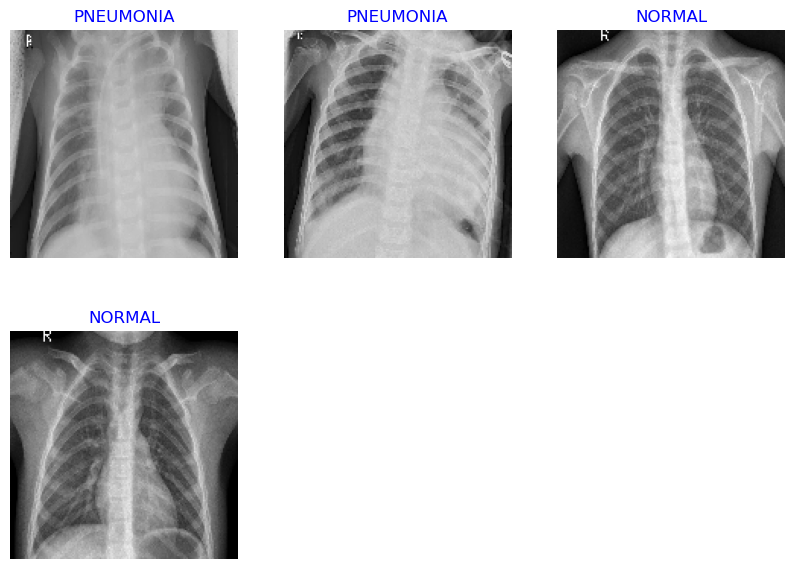

In [64]:
plot_prediction(random_set,5)


In [65]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve

In [66]:
real = test_set.classes
real

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [67]:
predictions = model_7.predict(test_set) > 0.5
predictions

2/2 [==============================] - 4s 535ms/step


array([[ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False]])

AxesSubplot(0.1675,0.11;0.5775x0.77)
report :               precision    recall  f1-score   support

           0       0.48      0.50      0.49        20
           1       0.47      0.45      0.46        20

    accuracy                           0.48        40
   macro avg       0.47      0.47      0.47        40
weighted avg       0.47      0.47      0.47        40



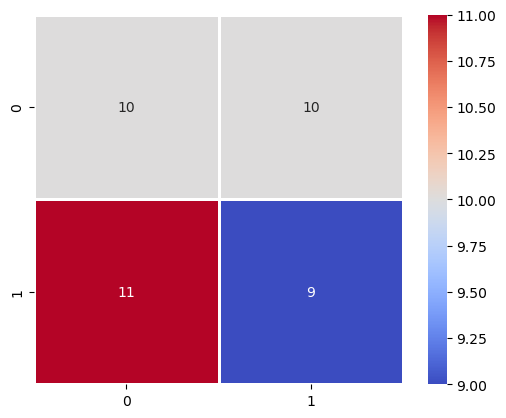

In [68]:
con = confusion_matrix(real, predictions)
print(sns.heatmap(con,cmap="coolwarm" ,annot=True,fmt="d",linewidths=1 ,square= True))
print('report :',classification_report(real, predictions ))

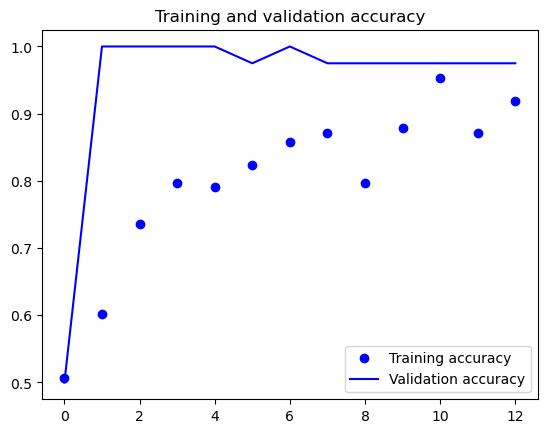

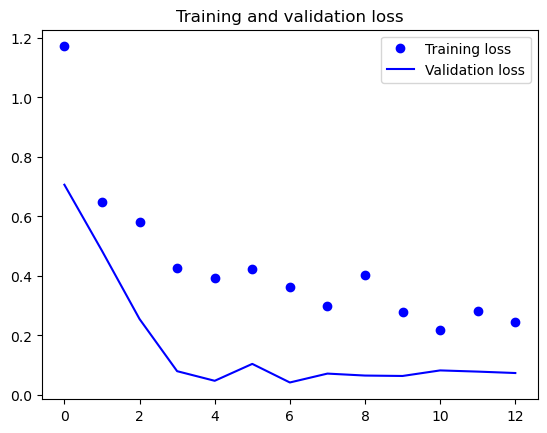

In [69]:
accuracy = mod_7.history['accuracy']
val_accuracy = mod_7.history['val_accuracy']
loss = mod_7.history['loss']
val_loss = mod_7.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [70]:
fpr, tpr, thresholds = roc_curve(real, predictions)
from sklearn.metrics import auc


In [71]:
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  0.475


In [78]:
predictions_2 = model_8.predict(test_set) > 0.5
predictions_2

2/2 [==============================] - 3s 353ms/step


array([[ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False]])

AxesSubplot(0.1675,0.11;0.5775x0.77)
report :               precision    recall  f1-score   support

           0       0.43      0.45      0.44        20
           1       0.42      0.40      0.41        20

    accuracy                           0.42        40
   macro avg       0.42      0.43      0.42        40
weighted avg       0.42      0.42      0.42        40



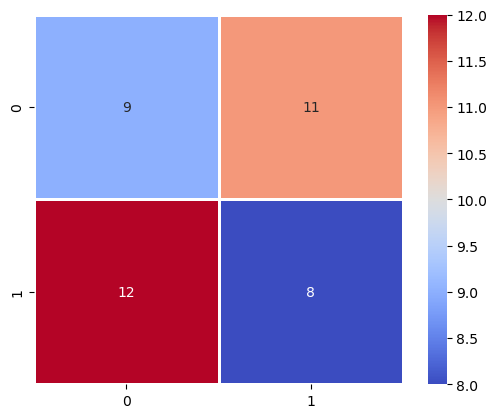

In [79]:
con = confusion_matrix(real, predictions_2)
print(sns.heatmap(con,cmap="coolwarm" ,annot=True,fmt="d",linewidths=1 ,square= True))
print('report :',classification_report(real, predictions_2 ))

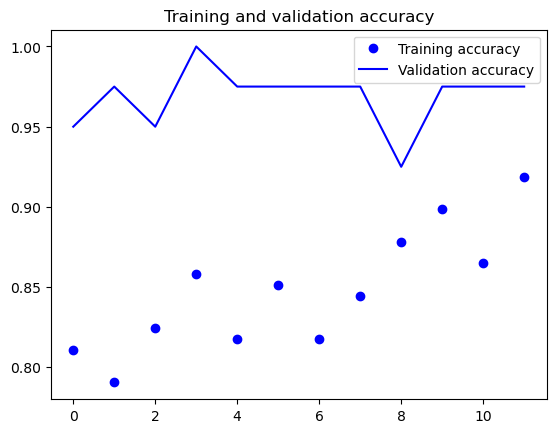

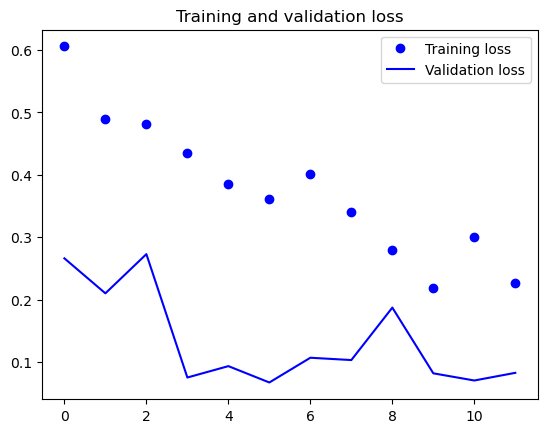

In [80]:
accuracy = mod_8.history['accuracy']
val_accuracy = mod_8.history['val_accuracy']
loss = mod_8.history['loss']
val_loss = mod_8.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [82]:
fpr, tpr, thresholds = roc_curve(real, predictions_2)
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  0.42499999999999993


In [85]:
predictions_3 = model_20.predict(test_set) > 0.5
predictions_3

2/2 [==============================] - 2s 171ms/step


array([[False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False]])

AxesSubplot(0.1675,0.11;0.5775x0.77)
report :               precision    recall  f1-score   support

           0       0.57      0.60      0.59        20
           1       0.58      0.55      0.56        20

    accuracy                           0.57        40
   macro avg       0.58      0.57      0.57        40
weighted avg       0.58      0.57      0.57        40



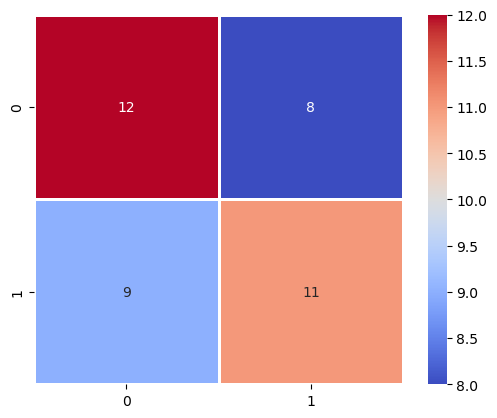

In [86]:
con = confusion_matrix(real, predictions_3)
print(sns.heatmap(con,cmap="coolwarm" ,annot=True,fmt="d",linewidths=1 ,square= True))
print('report :',classification_report(real, predictions_3 ))

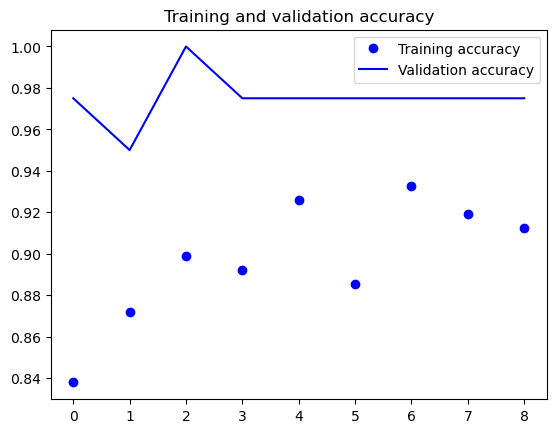

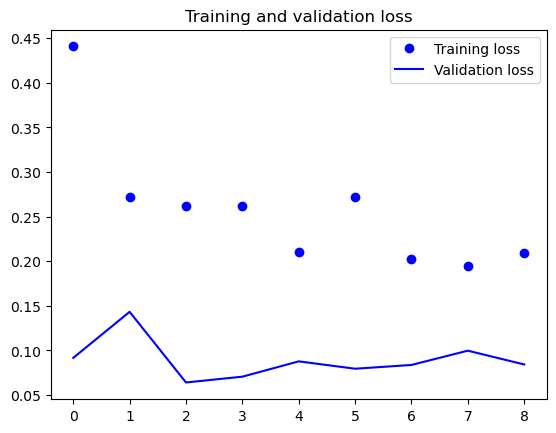

In [87]:
accuracy = mod_20.history['accuracy']
val_accuracy = mod_20.history['val_accuracy']
loss = mod_20.history['loss']
val_loss = mod_20.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [88]:
fpr, tpr, thresholds = roc_curve(real, predictions_3)
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  0.575


In [100]:
predictions_4 = model_2.predict(test_set) > 0.5
predictions_4

2/2 [==============================] - 2s 110ms/step


array([[False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False]])

AxesSubplot(0.1675,0.11;0.5775x0.77)
report :               precision    recall  f1-score   support

           0       0.57      0.60      0.59        20
           1       0.58      0.55      0.56        20

    accuracy                           0.57        40
   macro avg       0.58      0.57      0.57        40
weighted avg       0.58      0.57      0.57        40



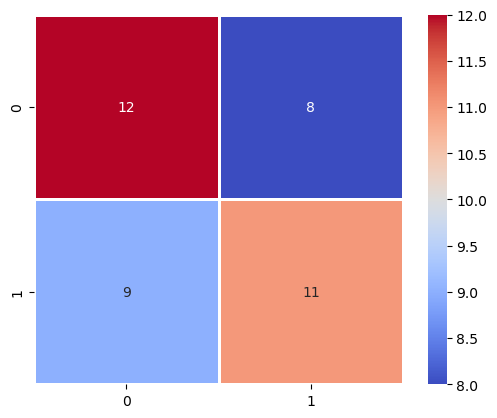

In [101]:
con = confusion_matrix(real, predictions_4)
print(sns.heatmap(con,cmap="coolwarm" ,annot=True,fmt="d",linewidths=1 ,square= True))
print('report :',classification_report(real, predictions_4 ))

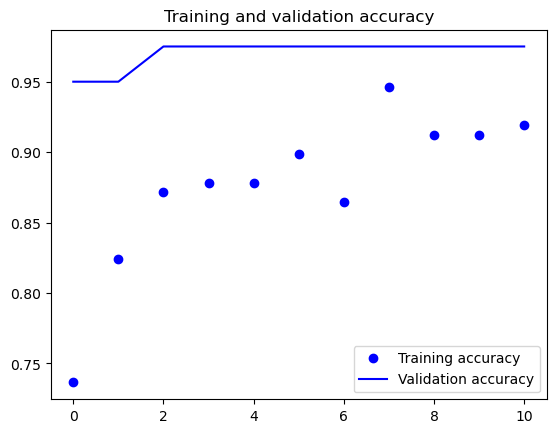

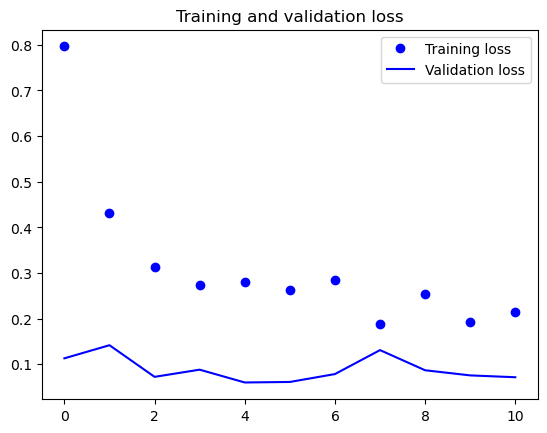

In [94]:
accuracy = mod_2.history['accuracy']
val_accuracy = mod_2.history['val_accuracy']
loss = mod_2.history['loss']
val_loss = mod_2.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [102]:
fpr, tpr, thresholds = roc_curve(real, predictions_4)
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  0.575


In [96]:
predictions_5 = model_3.predict(test_set) > 0.5
predictions_5

2/2 [==============================] - 2s 103ms/step


array([[ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True]])

AxesSubplot(0.1675,0.11;0.5775x0.77)
report :               precision    recall  f1-score   support

           0       0.48      0.50      0.49        20
           1       0.47      0.45      0.46        20

    accuracy                           0.48        40
   macro avg       0.47      0.47      0.47        40
weighted avg       0.47      0.47      0.47        40



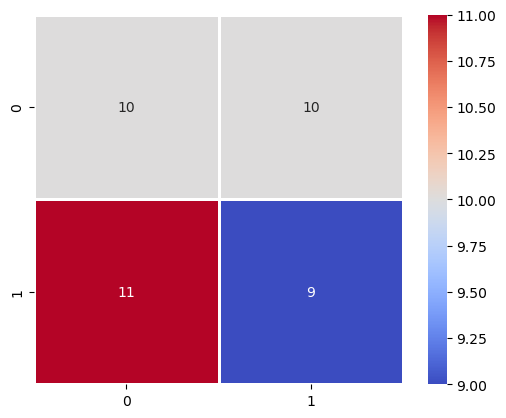

In [97]:
con = confusion_matrix(real, predictions_5)
print(sns.heatmap(con,cmap="coolwarm" ,annot=True,fmt="d",linewidths=1 ,square= True))
print('report :',classification_report(real, predictions_5 ))

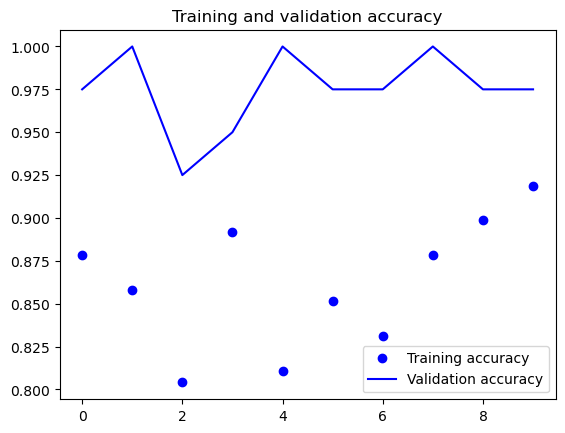

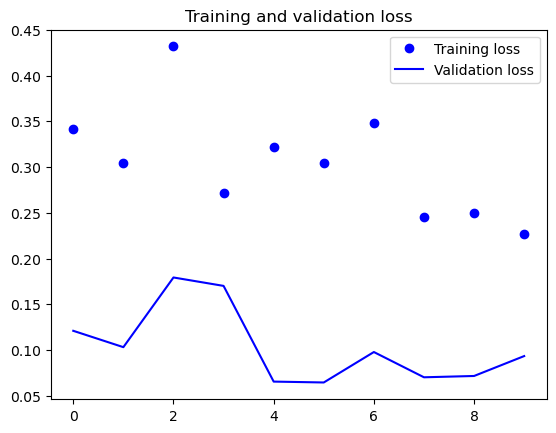

In [98]:
accuracy = mod_3.history['accuracy']
val_accuracy = mod_3.history['val_accuracy']
loss = mod_3.history['loss']
val_loss = mod_3.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [99]:
fpr, tpr, thresholds = roc_curve(real, predictions_5)
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  0.475
